# Particle Swarm Optimization Algorithm (in Python!) 

First of all, let's import the libraries we'll need (remember we are using Python 3)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import scipy as sp
# import time


%matplotlib inline
plt.style.use('bmh')

We can define and plot the function we want to optimize:

0
1
2
3
4


array([  6.59359908e+00,   3.62538494e+00,   4.44089210e-16,
         3.62538494e+00,   6.59359908e+00])

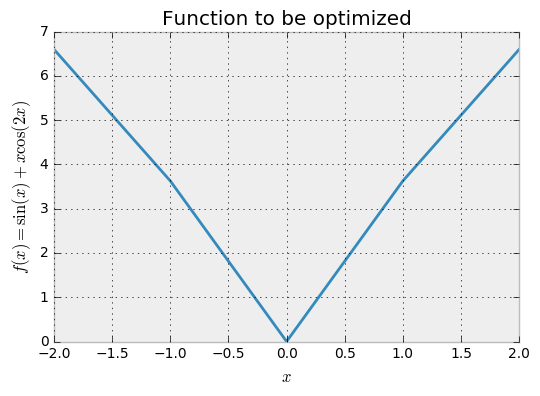

In [7]:
x_lo = -2
x_up = 2
n_points = 5

x = np.linspace(x_lo, x_up, n_points)
y = np.zeros(n_points)

def f(x):
    '''Ackley n-dimensional function
    x =  numpy array containing the independt variables as a vector
    
    returns y = objective function value
    '''
    n = 1
    #n = x.ndim  # n-dimensions of the vector 
    y = -20*np.exp(-0.2*(1/n*np.sum(x**2))**0.5) + \
        -np.exp(1/n*np.sum(np.cos(2*np.pi*x))) + 20 + np.exp(1);
        
    return y

for i in range(n_points):
    print(i)
    x_i = x[i]
    y[i] = f(x_i)

plt.plot(x,y)
plt.ylabel('$f(x) = \sin(x)+x\cos(2x)$')
plt.xlabel('$x$')
plt.title('Function to be optimized')
y

In [30]:
len(x)

5

So we will be using the [Particle Swarm Optimization algorithm](https://en.wikipedia.org/wiki/Particle_swarm_optimization) to obtain the minumum (SPOILER!)
![PSO-1D](img/PSS-Example-1D.gif)

## PSO Initialization

In [12]:
n_particles = 100
n_iterations = 250

x_particles = np.zeros((n_particles, n_iterations))
x_particles[:, 0] = np.random.uniform(x_lo, x_up, size=n_particles)

x_best_particles = np.copy(x_particles[:, 0])

y_particles = f(x_particles[:, 0])
y_best_global = np.min(y_particles[:])
index_best_global = np.argmin(y_particles[:])
x_best_p_global = x_particles[index_best_global,0]

velocity_lo = x_lo-x_up 
velocity_up = x_up-x_lo 

v_particles = np.zeros((n_particles, n_iterations))
v_particles[:, 0] = 0.01*np.random.uniform(velocity_lo, velocity_up, size=n_particles)

In [13]:
x_particles

array([[ 11.59697067,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 12.79091822,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -1.08215039,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ..., 
       [ -0.03583473,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ -3.64891961,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 13.36209456,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

## PSO Algorithm

In [14]:
# PSO parameters
#from IPython.core.debugger import Tracer

omega = 1
phi_p = 0.01  # particle best weight
phi_g = 0.1  # global global weight

iteration = 1
while iteration <= n_iterations-1:
    for i in range(n_particles):
            x_p = x_particles[i, iteration-1]
            v_p = v_particles[i, iteration-1]
            x_best_p = x_best_particles[i]
            
            
            r_p = np.random.uniform(0, 1)
            r_g = np.random.uniform(0, 1)
            
            v_p_new = omega*v_p + \
                        phi_p*r_p*(x_best_p-x_p) + \
                        phi_g*r_g*(x_best_p_global-x_p)
            
            x_p_new = x_p + v_p_new
            
            if not x_lo <= x_p_new <= x_up: 
                x_p_new = x_p # ignore new position, it's out of the domain
            
            x_particles[i, iteration] = x_p_new
            
            y_p_best = f(x_best_p)
            y_p_new = f(x_p_new)
            
            if y_p_new < y_p_best:
                x_best_particles[i] = x_p_new
                
                y_p_best_global = f(x_best_p_global)
                if y_p_new < y_p_best_global:
                    x_best_p_global = x_p_new
            
    iteration = iteration + 1

In [15]:
x_best_p_global

-11.153853699061006

# Animation

In [16]:
from __future__ import print_function
import ipywidgets as widgets

In [17]:
y_particles = f(x_particles)

In [18]:
def plotPSO(i=0): #iteration
    plt.plot(x,y)
    plt.ylabel('$f(x) = \sin(x)+x\cos(2x)$')
    plt.xlabel('$x$')
    plt.title('Function to be optimized')
    plt.plot(x_particles[:,i],y_particles[:,i],'ro')

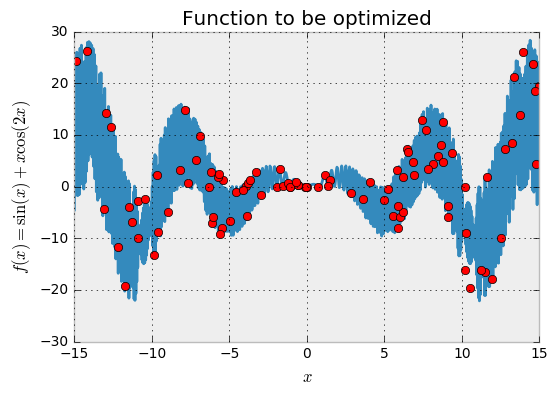

In [19]:
widgets.interact(plotPSO, i=(0,n_iterations-1))